In [1]:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import integrate
income = np.loadtxt('incomes.txt', delimiter=',', unpack=True)

# 1 Some income data, lognormal distribution and hypothesis testing
## Part (a) 
Plot a histogram of percentages of the income.txt data with 30 bins. Make sure that the bins are weighted using the normed= Ture option. Make sure your plot has corect x-axis and y-axis labels as well as a plot title.

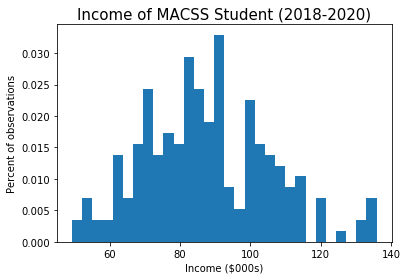

In [2]:
plt.hist(income/1000, 30, normed=True)
plt.title('Income of MACSS Student (2018-2020)', fontsize=15)
plt.xlabel(r'Income (\$000s)')
plt.ylabel('Percent of observations')
plt.show()

## Part (b) 
Plot the lognormal PDF $f(x|\mu = 11.0, \sigma = 0.5) \ for \ 0 \leq x \leq 150000.$ What is the value of the log likelihood value for this parametrization of this distribution and given this data?

In [3]:
# Define function that generates values of a potentially log normal
# probability density function (PDF)
def lognorm_pdf(xvals, mu, sigma):
    pdf_vals    = 1/ (xvals * sigma * np.sqrt(2 * np.pi)) * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))
    return pdf_vals

In [4]:
# Define log likelihood function for the normal distribution
def log_lik_lognorm(xvals, mu, sigma):
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

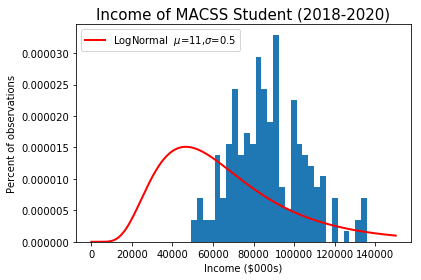

In [5]:
dist_pts = np.linspace(100, 150000, 500) # use a small number 100 rather than zero to avoid zero division error
mu = 11
sig = 0.5
plt.hist(income, 30, normed=True)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu, sig),
         linewidth=2, color='r', label= 'LogNormal  $\mu$=11,$\sigma$=0.5')
plt.legend(loc ='upper left')
plt.title('Income of MACSS Student (2018-2020)', fontsize=15)
plt.xlabel(r'Income (\$000s)')
plt.ylabel('Percent of observations')
plt.show()

In [6]:
print('Log-likelihood: ', log_lik_lognorm(income, mu, sig))

Log-likelihood:  -2385.85699781


## Part (c) 
Estimate the parameters of the lognormal distribution by maximum likelihood and plot its PDF against the PDF from part (b) and histogram from part (a). Plot the estimated PDEF for $0 \leq x \leq 150000$. Report the ML estimate for $\mu$ and $\sigma$, the value of the likelihood function, and the variance-covariance matrix

In [7]:
def crit(params, *args):
    mu, sigma = params
    xvals, cutoffs = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [8]:
import scipy.optimize as opt
mu_init = 11  # mu
sig_init = 0.3  # sig
params_init = np.array([mu_init, sig_init])
mle_args = income
result1 = opt.minimize(crit, params_init, args=(mle_args, 'None'))
mu_MLE, sig_MLE = result1.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('MLE_Log-likelihood: ', -result1.fun)

mu_MLE= 11.359022996  sig_MLE= 0.208177319695
MLE_Log-likelihood:  -2241.7193013573583


In [9]:
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = np.array(result1.hess_inv) * OffDiagNeg
print('Variance CoVariance Matrix (MLE) = ', vcv_mle)

Variance CoVariance Matrix (MLE) =  [[  2.39452035e-04   1.52670717e-06]
 [  1.52670717e-06   1.08243062e-04]]


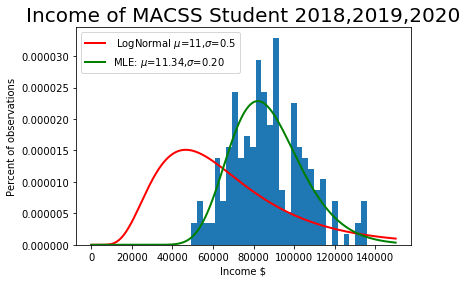

In [10]:
plt.hist(income, 30, normed=True)
plt.title('Income of MACSS Student 2018,2019,2020', fontsize=20)
plt.xlabel(r'Income $')
plt.ylabel('Percent of observations')
mu_MLE= 11.359022996  
sig_MLE= 0.208177319695
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu, sig),
         linewidth=2, color='r', label=' LogNormal $\mu$=11,$\sigma$=0.5')
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sig_MLE),
         linewidth=2, color='g', label='MLE: $\mu$=11.34,$\sigma$=0.20')
plt.legend(loc ='upper left')
plt.show()

(d) Perform a likelihood ratio test to determine the probability that data in incomes.txt came from the distribution in part (b)

In [11]:
log_lik_h0 = log_lik_lognorm(income, 11, 0.5)
log_lik_mle = log_lik_lognorm(income, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


Because we have a low p-value, we rejecte null hypothesis. Therefore the data in the income.txt are unlikely coming from distrbution in part (b)

(e) With your estimated distribution of incomes for Chicago MACSS students from part (c), you now have a model for what your own income might look like when you graudate. Using that estimated model from part (c) What is the probability that you will earn more than \$100,000 ? What is the probability that you will earn less than \$75,000?

In [12]:
def lognorm_cdf(x, mu, sigma):
    return integrate.quad(lambda x: lognorm_pdf(x, mu, sigma), 0, x)
print("Probability of earning $ 75,000 or less", lognorm_cdf(75000, mu_MLE, sig_MLE)[0])
print("Probability of earning $ 100,000 or more", 1 - lognorm_cdf(100000, mu_MLE, sig_MLE)[0])

Probability of earning $ 75,000 or less 0.26023426886470374
Probability of earning $ 100,000 or more 0.2298668332646997


# 2 Linear regression and MLE (4 points) 
## Part (a) 
Estimate the parameters of model by maximum likelihood using the fact the each error term $\epsilon_i$ is distributed normally $N(0, \sigma^2)$

In [13]:
sick, age, children, temp = np.loadtxt('sick.txt', delimiter=',', skiprows=1, unpack=True)

In [14]:
# Get a pdf of normal function
def norm_pdf(xvals, mu, sigma):
    pdf_vals = 1/ (sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - mu)**2 / (2 * sigma**2))
    return pdf_vals

In [15]:
# get a log likelihood estimation
def log_lik_norm(xvals, mu, sigma):
    pdf_vals = norm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [16]:
# get  a log likelihood for a regression using certain parameters and certain data
def log_regre(params, *data):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    sick, age, children, temp = data
    xvals = sick - beta_0 - beta_1 * age - beta_2 * children - beta_3 * temp
    log_lik_val = log_lik_norm(xvals, 0, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [17]:
beta_0_init = 0
beta_1_init  = 0
beta_2_init  = 0
beta_3_init  = 0
sigma_init = 1
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, beta_3_init, sigma_init])
mle_args = sick, age, children, temp
results = opt.minimize(log_regre, params_init, args=(mle_args))
print('The parameter from beta_0 to sigma is: ', results.x )
print('MLE_Log-likelihood: ', results.fun)

The parameter from beta_0 to sigma is:  [ 0.25164696  0.0129334   0.40050156 -0.00999171  0.00301777]
MLE_Log-likelihood:  -876.8650470218196


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [18]:
OffDiagNeg = -np.ones(results.hess_inv.shape) + np.eye(results.hess_inv.shape[0])*2
vcv_mle = np.array(results.hess_inv)* OffDiagNeg 
print('Variance CoVariance Matrix (MLE) = ', vcv_mle)

Variance CoVariance Matrix (MLE) =  [[  8.95220732e-07  -1.18060705e-08   2.02774294e-07   2.27656435e-08
   -3.36234635e-09]
 [ -1.18060705e-08   3.89770154e-09   3.43642499e-08   2.55579432e-09
   -2.11698918e-11]
 [  2.02774294e-07   3.43642499e-08   3.56241307e-07  -2.27346736e-08
    1.86687499e-09]
 [  2.27656435e-08   2.55579432e-09  -2.27346736e-08   2.01821875e-09
    4.81914135e-11]
 [ -3.36234635e-09  -2.11698918e-11   1.86687499e-09   4.81914135e-11
    2.31587509e-08]]


## Part (b) 
Use a likelihood ratio test to determine the probability that $\beta_0 = 1.0, \sigma^2 = 0.01$ and $\beta_1, \beta_2, \beta_3 = 0$. That is, what is the likelihood that age, number of children, and average winter temperature have no effect on the number of sick days?

In [19]:
log_lik_h0 = -log_regre([1, 0, 0, 0, 0.1], sick, age, children, temp)
log_lik_mle = results.fun
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


We have a low p-value, therefore we reject the null hypothesis. Therefore it is unlikely that age, number of children and average temperature have no effect on the number of sick days.